In [5]:
from astropy.table import Table,vstack
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from astropy.cosmology import WMAP9
from scipy.optimize import curve_fit

In [3]:
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=20), plt.rc('ytick', labelsize=20)
plt.rcParams['savefig.dpi'] = 150
plt.rc('text',usetex=True)

## Halo mass estimation (stellar-halo mass relation)

$\begin{array} { l } { \log _ { 10 } \left( f _ { \mathrm { SM } - \mathrm { HM } } ^ { - 1 } \right) = \log _ { 10 } \left( M _ { \mathrm { h } } \left( M _ { \star } \right) \right) = } \\ { \log _ { 10 } \left( M _ { 1 } \right) + \beta \log _ { 10 } \left( \frac { M _ { \star } } { M _ { \star , 0 } } \right) + \frac { \left( \frac { M _ { \star } } { M _ { \star } , 0 } \right) ^ { \delta } } { 1 + \left( \frac { M _ { \star } } { M _ { \star , 0 } } \right) ^ { - \gamma } } - \frac { 1 } { 2 } } \end{array}$

$r_{200}=\left(\frac{3M_{200}}{800\pi\bar{\rho}}\right)^{1/3}$

In [4]:
# SHMR
def mh(log_Ms, params):
    M1, Ms0, beta, delta, gamma = params[0],params[1],params[2],params[3],params[4]
    Ms = 10**log_Ms
    log_mh = np.log10(M1)+beta*np.log10(Ms/Ms0)+(Ms/Ms0)**delta/(1+(Ms/Ms0)**(-1*gamma))-0.5
    return log_mh

# Leauthaud et al. 2012 (0.22<z<0.48)
def set_params(a,b,c,d,e):
    M1 = 10**(12.52 + a*0.037)
    Ms0 = 10**(10.916 + b*0.02)
    beta = 0.457 + c*0.009
    delta = 0.566 + d*0.086
    gamma = 1.53 + e*0.18
    return M1, Ms0, beta, delta, gamma

# Coupon et al. 2015 (0.5<z<1)
def set_params_coupon(a,b,c,d,e):
    M1 = 10**(12.84 + a*0.023)
    Ms0 = 10**(10.98 + b*0.017)
    beta = 0.48 + c*0.019
    delta = 0.63 + d*0.084
    gamma = 1.6 + e*0.18
    return M1, Ms0, beta, delta, gamma

# definition of r200
def r_200(log_Ms,params):
    # r200 in kpc
    rho_bar = 9.9e-30 # g/cm^3
    log_Mh = mh(log_Ms,params)
    return ((3*10**log_Mh*1.989e30*1e3)/(800*np.pi*rho_bar))**(1/3)/3.086e21

def get_min_max(log_Ms, set_param_func):
    params_min = set_param_func(-1,-1,-1,-1,-1)
    log_Mh_min = mh(log_Ms,params_min)
    params_max = set_param_func(1,-1,1,1,1)
    log_Mh_max = mh(log_Ms,params_max)
    return log_Mh_min, log_Mh_max

### SHMR

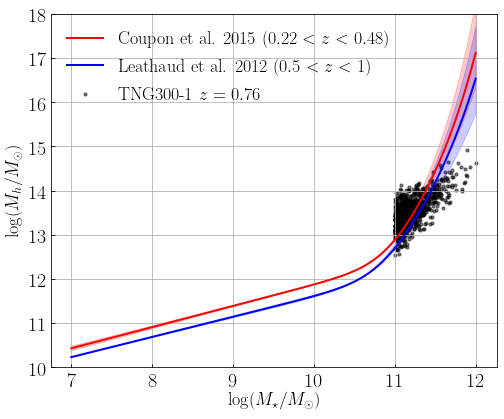

In [5]:
log_Ms = np.linspace(7,12,100)
fig, axs = plt.subplots(1, 1, figsize=(8,6.5))

# from Coupon et al. 2015
params= set_params_coupon(0,0,0,0,0)
log_Mh = mh(log_Ms,params)
log_Mh_min, log_Mh_max = get_min_max(log_Ms, set_params_coupon)
plt.plot(log_Ms,log_Mh,'r',linewidth=2,label=r'Coupon et al. 2015 ($0.22<z<0.48$)')
plt.fill_between(log_Ms,log_Mh_min, log_Mh_max, alpha=0.2, color='r')

# from Leathaud et al. 2012
params= set_params(0,0,0,0,0)
log_Mh = mh(log_Ms,params)
log_Mh_min, log_Mh_max = get_min_max(log_Ms, set_params)
plt.plot(log_Ms,log_Mh,'b',linewidth=2,label=r'Leathaud et al. 2012 ($0.5<z<1$)')
plt.fill_between(log_Ms,log_Mh_min, log_Mh_max, alpha=0.2, color='b')

ms_mh_sim = np.load('ms_mh_central.npy')
plt.scatter(ms_mh_sim[0],ms_mh_sim[1],s=10,c='k',alpha=0.5,label='TNG300-1 $z=0.76$')
                    
plt.xlabel('$\log(M_\star/M_\odot)$',fontsize=18)
plt.ylabel('$\log(M_h/M_\odot)$',fontsize=18)
plt.grid()
plt.ylim([10,18])
plt.legend(frameon=False,fontsize=18)
plt.savefig('figures/mh_hs.png')

In [6]:
a = np.array([12,3,4,5])
print(np.where(a==3)[0][0])

1


## histogram of stellar/halo masses

very important to know just what it is

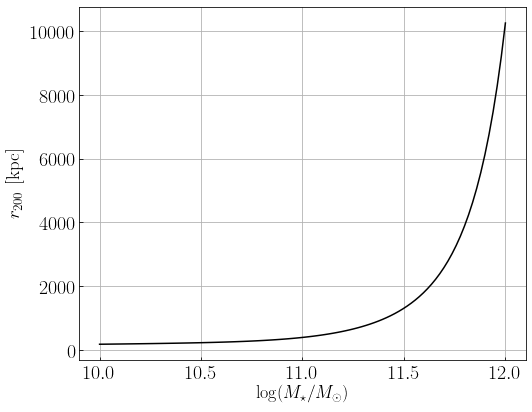

In [8]:
# r200 estimation
log_Ms = np.linspace(10.0,12.0,100)
r200 = r_200(log_Ms,set_params_coupon(0,0,0,0,0))

fig, axs = plt.subplots(1, 1, figsize=(8,6.5))
plt.plot(log_Ms,r200,'k')
plt.xlabel('$\log(M_\star/M_\odot)$',fontsize=18)
plt.ylabel('$r_{200}$ [kpc]',fontsize=19)
plt.grid()

plt.savefig('figures/ms_r200.png')

concentration from Ludlow et al. 2013
1. nomalization used by mean of $z=0$ and $z=1$ plots

In [45]:
import glob

file_list = glob.glob('CUT_deep_catalogs/massive_gal_positions/*_11.15_0.8.positions.fits')
cat_cen = Table.read(file_list[0])
for file in file_list[1:]:
    cat_cen = vstack([cat_cen,Table.read(file)])

median log_m_h 13.575026983925204
136.90188642627734 105.85812512558442 230.0585036466768
median log_m_h 13.861231212244057
182.15087624051716 128.34430075134475 379.55115095086495
median log_m_h 13.659095203542112
148.88090303165365 110.73505929517239 274.0489482590293


/Users/lejay/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:664: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


Text(0.5, 0, '$r_s$ [kpc]')

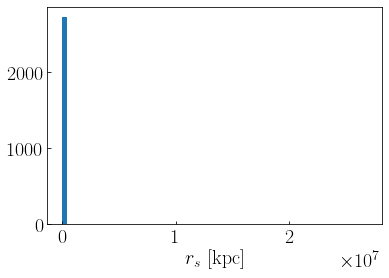

In [46]:
# histogram of r200's

for params_deviation in [[-1,-1,-1,-1,-1],[1,-1,1,1,1],[0,0,0,0,0]]:
    a,b,c,d,e = params_deviation[0],params_deviation[1],params_deviation[2],params_deviation[3],params_deviation[4]
    params = set_params_coupon(a,b,c,d,e)
    
    log_ms = cat_cen['MASS_MED']
    log_mh = mh(log_ms,params)
    c = 10**(-0.1*log_mh+2.05)  # concentration from Ludlow+2014
    
    r200 = r_200(log_ms,params)
    rs = r200/c

    rs_median = np.median(rs)
    print('median log_m_h',np.median(log_mh))
    rs_16 = np.percentile(rs,16)
    rs_84 = np.percentile(rs,84)
    print(rs_median,rs_16,rs_84)

plt.hist(rs,bins=70)
# plt.xlim([0,500])
plt.xlabel(r'$r_s$ [kpc]',fontsize=20)

## NFW

In [8]:
def nfw(r, rs, I):
    x = r / float(rs)
    y = np.piecewise(x, [x < 1, x==1, x > 1],
                     [lambda x:I*(x**2-1)**(-1)*(1-2/np.sqrt(1-x**2)*np.arctanh(np.sqrt((1-x)/(1+x)))), 
                      lambda x:I*1./3, 
                      lambda x:I*(x**2-1)**(-1)*(1-2/np.sqrt(x**2-1)*np.arctan(np.sqrt((x-1)/(1+x))))])
    return y

def fit_nfw(xdata, ydata, ydata_err, start):
    popt,pcov = curve_fit(nfw, xdata[start-1:], ydata[start-1:], sigma=ydata_err[start-1:])
    
    res = ydata - nfw(xdata, *popt)
    chi2 = sum((res / ydata_err) ** 2)
    return popt,pcov,chi2

## Number density profile scaled to $r_{200}$

In [9]:
def combine_deep(csfq, ssfq, masscut_low, masscut_high, z, path):
    try:
        affix = '_' + str(masscut_low) + '_' + str(csfq) + '_' + str(ssfq) + '_' + str(z)+'.txt'
        cosmos_deep = np.genfromtxt(path+'countCOSMOS_deep'+affix)
        sxds_uddd = np.genfromtxt(path+'countSXDS_uddd'+affix)
        elais_deep = np.genfromtxt(path+'countELAIS_deep'+affix)
        xmmlss_deep = np.genfromtxt(path+'countXMM-LSS_deep'+affix)
        deep_deep = np.genfromtxt(path+'countDEEP_deep'+affix)
    except IOError:
        affix = '_' + str(masscut_low) + '_' + str(csfq) + '_' + str(ssfq) + '_' + str(z)
        cosmos_deep = np.genfromtxt(path+'countCOSMOS_deep'+affix)
        sxds_uddd = np.genfromtxt(path+'countSXDS_uddd'+affix)
        elais_deep = np.genfromtxt(path+'countELAIS_deep'+affix)
        xmmlss_deep = np.genfromtxt(path+'countXMM-LSS_deep'+affix)
        deep_deep = np.genfromtxt(path+'countDEEP_deep'+affix)
    
    n_cosmos = int(cosmos_deep[0])
    n_sxds = int(sxds_uddd[0])
    n_elais = int(elais_deep[0])
    n_xmmlss = int(xmmlss_deep[0])
    n_deep = int(deep_deep[0])
    n_combine = [n_cosmos, n_sxds, n_elais, n_xmmlss, n_deep]
    
    split_index = int(((len(cosmos_deep)-1)/2)+1)
    radial_cosmos = cosmos_deep[1:split_index]
    radial_sxds = sxds_uddd[1:split_index]
    radial_elais = elais_deep[1:split_index]
    radial_xmmlss = xmmlss_deep[1:split_index]
    radial_deep = deep_deep[1:split_index]
    radial_combine = np.vstack([radial_cosmos, radial_sxds, radial_xmmlss, radial_deep, radial_elais])

    radial = np.average(radial_combine, axis=0, weights=n_combine)
    
    radial_cosmos_err = cosmos_deep[split_index:]
    radial_sxds_err = sxds_uddd[split_index:]
    radial_elais_err = elais_deep[split_index:]
    radial_xmmlss_err = xmmlss_deep[split_index:]
    radial_deep_err = deep_deep[split_index:]
    radial_combine_err = [radial_cosmos, radial_sxds, radial_xmmlss, radial_deep, radial_elais]
    radial_err = np.sqrt(radial_cosmos_err**2*n_cosmos**2+radial_xmmlss_err**2*n_xmmlss**2+radial_elais_err**2*n_elais**2+radial_sxds_err**2*n_sxds**2+radial_deep_err**2*n_deep**2)/np.sum(n_combine)
    return (radial, radial_err, sum(n_combine))

[61.07358957 43.28714147 37.08000033 39.30426328 30.76765119 23.12521215
 10.79849867  6.62166287  4.97802127  3.30270701  2.66197056  1.98948722
  1.21137769  0.47103796]
c = 3.2529544957898984


/Users/lejay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in arctanh
  after removing the cwd from sys.path.
/Users/lejay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in arctanh
  after removing the cwd from sys.path.


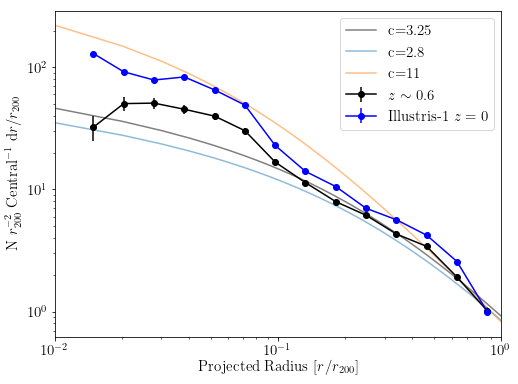

In [17]:
z=0.6
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=15), plt.rc('ytick', labelsize=15)
fig, axs = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(8,6))

path = 'CUT_deep_catalogs/total_sample_r200/'
radial_2 = combine_deep('all','all','9.5','inf',z, path)
bin_centers = np.load(path+'bin_centers.npy')


radial_sim = np.load('Illustris_z0_radial.npy')
print(radial_sim)
plt.errorbar(bin_centers, radial_2[0],yerr=radial_2[1],fmt='-ok',label='$z\sim$ '+str(z))
plt.errorbar(bin_centers, radial_sim/radial_sim[-1],yerr=0,fmt='-ob',label='Illustris-1 $z=0$')

## NFW overlay
fit_x = np.linspace(0,1,num=100)
popt,pcov,chi2 = fit_nfw(bin_centers,radial_2[0],radial_2[1], 7)
plt.plot(fit_x,nfw(fit_x,popt[0],popt[1]),'k',alpha=0.5,label='c='+str(round(1/popt[0],2)))
plt.plot(fit_x,nfw(fit_x,1/2.8,popt[1])/nfw(0.9,1/2.8,popt[1]),alpha=0.5,label='c=2.8')
plt.plot(fit_x,nfw(fit_x,1/11,popt[1])/nfw(0.9,1/11,popt[1]),alpha=0.5,label='c=11')
print('c =',1/popt[0])

plt.xlabel('Projected Radius [$r/r_{200}$]', fontsize=15)
plt.ylabel(r'N $r_{200}^{-2}$ Central$^{-1}$ d$r/r_{200}$',fontsize=15)
plt.legend(fontsize=15)
plt.xscale('log')
plt.yscale('log')
plt.xlim([0.01,1.0])

plt.savefig('figures/radial_total_'+str(z)+'_r200.png')
plt.show()

## Combine redshift bins plots

Conformity Plot (all redshifts)

do I need to balance the two central samples to have same mass distribution?

In [115]:
def red_frac_err(q, sf, q_err, sf_err):
    return np.sqrt( (sf**2*q_err**2 + q**2*sf_err**2) / ((q+sf)**4) )

# move value<=0 to 1e-10 to avoid bad behavior from plt.fill_between
def aa(array):
    for i in range(len(array)):
        if array[i]<=0:
            array[i] = 1e-10
    return array

In [116]:
def nfw(r, rs, I):
    x = r / float(rs)
    y = np.piecewise(x, [x < 1, x==1, x > 1],
                     [lambda x:I*(x**2-1)**(-1)*(1-2/np.sqrt(1-x**2)*np.arctanh(np.sqrt((1-x)/(1+x)))), 
                      lambda x:I*1./3, 
                      lambda x:I*(x**2-1)**(-1)*(1-2/np.sqrt(x**2-1)*np.arctan(np.sqrt((x-1)/(1+x))))])
    return y

def fit_nfw(xdata, ydata, ydata_err, start):
    popt,pcov = curve_fit(nfw, xdata[start-1:], ydata[start-1:], sigma=ydata_err[start-1:])
    
    res = ydata - nfw(xdata, *popt)
    chi2 = sum((res / ydata_err) ** 2)
    return popt,pcov,chi2

In [117]:
def sersic(r,Ie,re,n):
#     n=5.5
    b=2*n-1./3
    sersic = Ie * np.exp(-b*((r/float(re))**(1/float(n))-1))
    return sersic

def nfw_sersic(r, rs, I, Ie,re, n):
    sersic_val = sersic(r,Ie,re,n)
    nfw_val = nfw(r,rs,I)
    
    return nfw_val + sersic_val

def fit_nfw_sersic(xdata, ydata, ydata_err, start):
    xdata = xdata[start-1:]
    ydata = ydata[start-1:]
    ydata_err = ydata_err[start-1:]
    popt,pcov = curve_fit(nfw_sersic, xdata, ydata, sigma=ydata_err, p0=[250,2e-5,4e-5,13.1, 5.5]
                          ,bounds=([0, 0, 0 ,0 ,0.5],[1000, 1e-3, 1e-3, 100, 10]))
    res = ydata - nfw_sersic(xdata, *popt)
    chi2 = sum((res / ydata_err) ** 2)
    return popt,pcov,chi2



[1.000e+03 5.409e-06 3.867e-05 3.119e+01 6.108e+00] [9.727e+02 5.560e-06 1.333e-04 5.696e+01 5.163e+01] Chi2_dof=1.0
[8.831e+02 4.463e-06 1.656e-05 3.677e+01 6.180e-01] [2.028e+02 8.499e-07 5.725e-06 6.928e+00 5.779e-01] Chi2_dof=0.73
[9.001e+02 1.796e-06 1.112e-04 1.147e+01 1.000e+01] [9.432e+02 2.138e-06 4.121e-03 2.002e+02 1.787e+02] Chi2_dof=0.68
[3.755e+02 1.690e-05 4.565e-05 3.587e+01 7.248e-01] [4.328e+01 2.113e-06 6.539e-06 2.868e+00 2.713e-01] Chi2_dof=1.83
[4.210e+02 9.122e-06 3.029e-05 3.195e+01 5.000e-01] [6.929e+01 1.508e-06 7.935e-06 3.994e+00 3.344e-01] Chi2_dof=3.74
[2.458e+02 1.092e-05 2.144e-05 3.103e+01 5.000e-01] [2.649e+01 1.439e-06 5.897e-06 3.846e+00 3.235e-01] Chi2_dof=2.19


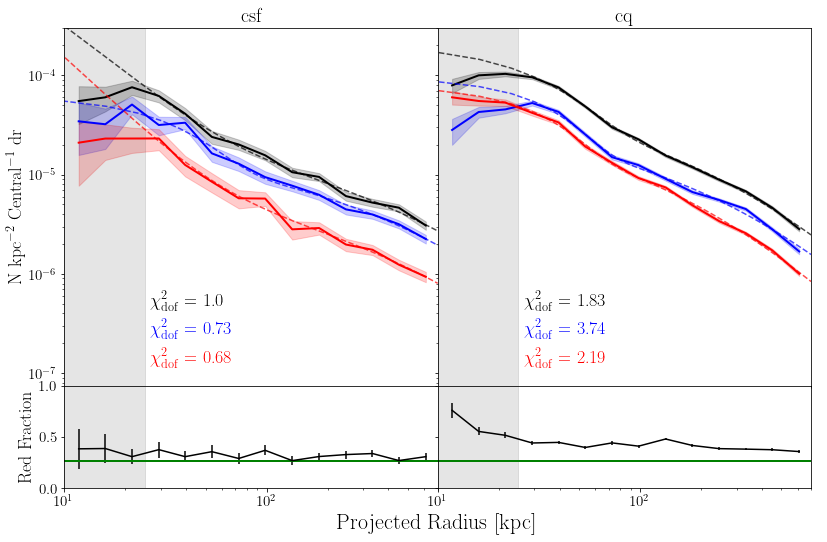

In [151]:
# combine redshift bins
np.set_printoptions(precision=3)
start=4

path = 'CUT_deep_catalogs/conformity/'
bin_edges = np.load(path+'bin_centers.npy') # use bin centers instead

fig, axs = plt.subplots(2, 2, sharex=True, sharey='row', figsize = (12, 8),
                        gridspec_kw={'height_ratios':[3.5,1]})

bin_centers = np.load(path+'bin_centers.npy')
for i in range(1):
    axs[i][0].set_ylabel('N kpc$^{-2}$ Central$^{-1}$ dr',fontsize=18)
    csfq_list = ['csf','cq']
    for j in range(2):
        z=0.4
        axs[0][j].set_title(csfq_list[j],fontsize=20)
        radial_all = combine_deep(csfq_list[j],'all','9.5','inf','allz', path)
        radial_sf = combine_deep(csfq_list[j],'ssf','9.5','inf','allz', path)
        radial_q = combine_deep(csfq_list[j],'sq','9.5','inf','allz', path)
        
        red_err = red_frac_err(radial_q[0],radial_sf[0],radial_q[1],radial_sf[1])
        red_frac = radial_q[0] / radial_all[0]
        
        # plot radial number density profiles
        for radial,color,yloc in [(radial_all,'k',0.21), (radial_sf,'b',0.13), (radial_q,'r',0.05)]:
            axs[i][j].plot(bin_centers, radial[0],color=color,linewidth=2,label='all')
            axs[i][j].fill_between(bin_centers,radial[0]+radial[1],
                                   aa(radial[0]-radial[1]), alpha=0.2, color=color)
        
            # model fitting
            fit_x = np.linspace(2,700,num=100)        
            popt,pcov,chi2 = fit_nfw_sersic(bin_edges,radial[0],radial[1], start)
            perr = np.sqrt(np.diag(pcov))
            dof = len(bin_edges)-start+1 - len(popt) # degree of freedom
            print(popt,perr,'Chi2_dof='+str(round(chi2/dof,2)))

            axs[i][j].annotate('$\chi^2_\mathrm{dof}$ = '+str(round(chi2/dof,2)),
                               xy=([0.23,yloc]),xycoords='axes fraction',fontsize=18,color=color)
            axs[0][j].plot(fit_x,nfw_sersic(fit_x, popt[0],popt[1],popt[2],popt[3],popt[4]),'--'+color,alpha=0.7)
        
        # red fraction
        axs[1][j].errorbar(bin_edges, red_frac,yerr=red_err,color='k')
        
        # add shaded (non-fitting) region
        axs[0][j].axvspan(10, 25, alpha=0.1, color='k')
        axs[1][j].axvspan(10, 25, alpha=0.1, color='k')

#=============================
axs[0][0].set_ylim([7.5e-8,3e-4])
axs[0][0].set_xlim([10,700])
axs[0][0].set_yscale('log')
axs[0][0].set_xscale('log')
axs[1][0].set_ylim([0,1])
axs[1][0].set_ylabel('Red Fraction',fontsize=18)

q_fraction_field = np.genfromtxt('CUT_deep_catalogs/field_q_frac.txt')[int(0.4*10%2)-1]
axs[1][0].plot([10,700],[q_fraction_field,q_fraction_field],linewidth=2,color='g')
axs[1][1].plot([10,700],[q_fraction_field,q_fraction_field],linewidth=2,color='g')


fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel('Projected Radius [kpc]', fontsize=22)
plt.tight_layout()
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
plt.savefig('figures/conformity_allz.png')
plt.show()
plt.close()

In [18]:
gal_num=0
for cat_name in ['COSMOS_deep','ELAIS_deep', 'XMM-LSS_deep', 'DEEP_deep', 'SXDS_uddd']:
    cat = Table(fits.getdata('CUT_deep_catalogs/s16a_' + cat_name + '_masterCat.fits'))
    cat_gal = cat[np.logical_and(cat['preds_median'] < 0.89, cat['inside'] == True)]
    gal_num += len(cat_gal)
    
print(gal_num)

5212757


In [8]:
import astropy.units as u
from astropy.cosmology import WMAP9

In [17]:
z = 0.6
dz = 1.5*0.044*(1+z)
print(dz)
dis1 = WMAP9.angular_diameter_distance(z).value
dis2 = WMAP9.angular_diameter_distance(z+dz).value
print(dis2)
print(dis2-dis1)

0.10560000000000001
1502.4345000967894
102.31831021446192
